# ***Modelo de Regresión Lineal Simple***

In [78]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [79]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'parameters',
    'model_input_table'
]

In [80]:
catalog.load("model_input_table")

[10/25/25 22:16:26] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=119257;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=302910;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Overall_Class,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,Alto,0,0,0,179,69.000000,107500000.0,250000.0,206900000.0,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,Alto,0,0,0,189,82.000000,93000000.0,140000.0,160400000.0,2022
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,4.0,...,Alto,0,0,0,182,83.000000,44500000.0,135000.0,91200000.0,2022
3,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,3.0,...,Medio,0,0,0,172,69.000000,37000000.0,45000.0,77700000.0,2022
4,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,4.0,...,Alto,0,0,0,177,75.000000,108000000.0,160000.0,186300000.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,V. Storsve,17,Norway,50,72,Lillestrøm SK,773,Right,1.0,2.0,...,Bajo,0,0,0,185,64.863656,50000.0,5000.0,113000.0,2020
50522,B. Sinzig,19,Switzerland,50,60,Neuchâtel Xamax,764,Right,1.0,2.0,...,Bajo,0,0,0,190,81.192968,35000.0,5000.0,58000.0,2020
50523,18 N. Krucker,18,Switzerland,50,61,FC St. Gallen,757,Right,1.0,3.0,...,Bajo,0,0,0,183,79.832192,35000.0,1000.0,66000.0,2020
50524,18 A. Viscovo,18,Italy,51,70,Crotone,755,Right,1.0,2.0,...,Bajo,0,0,0,190,78.925008,60000.0,5000.0,146000.0,2020


In [81]:
df_FIFA = catalog.load("model_input_table")

                    INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=818604;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=634185;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

#### **Importaciones**

In [82]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

# -- Procesado y modelado --
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

# -- Metricas --
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

# -- GridSearchCV -- 
from sklearn.model_selection import GridSearchCV

# -- CrossValidation -- 
from sklearn.model_selection import cross_val_score

In [83]:
df_FIFA['Value_num'] = np.log1p(df_FIFA['Value_num'])  

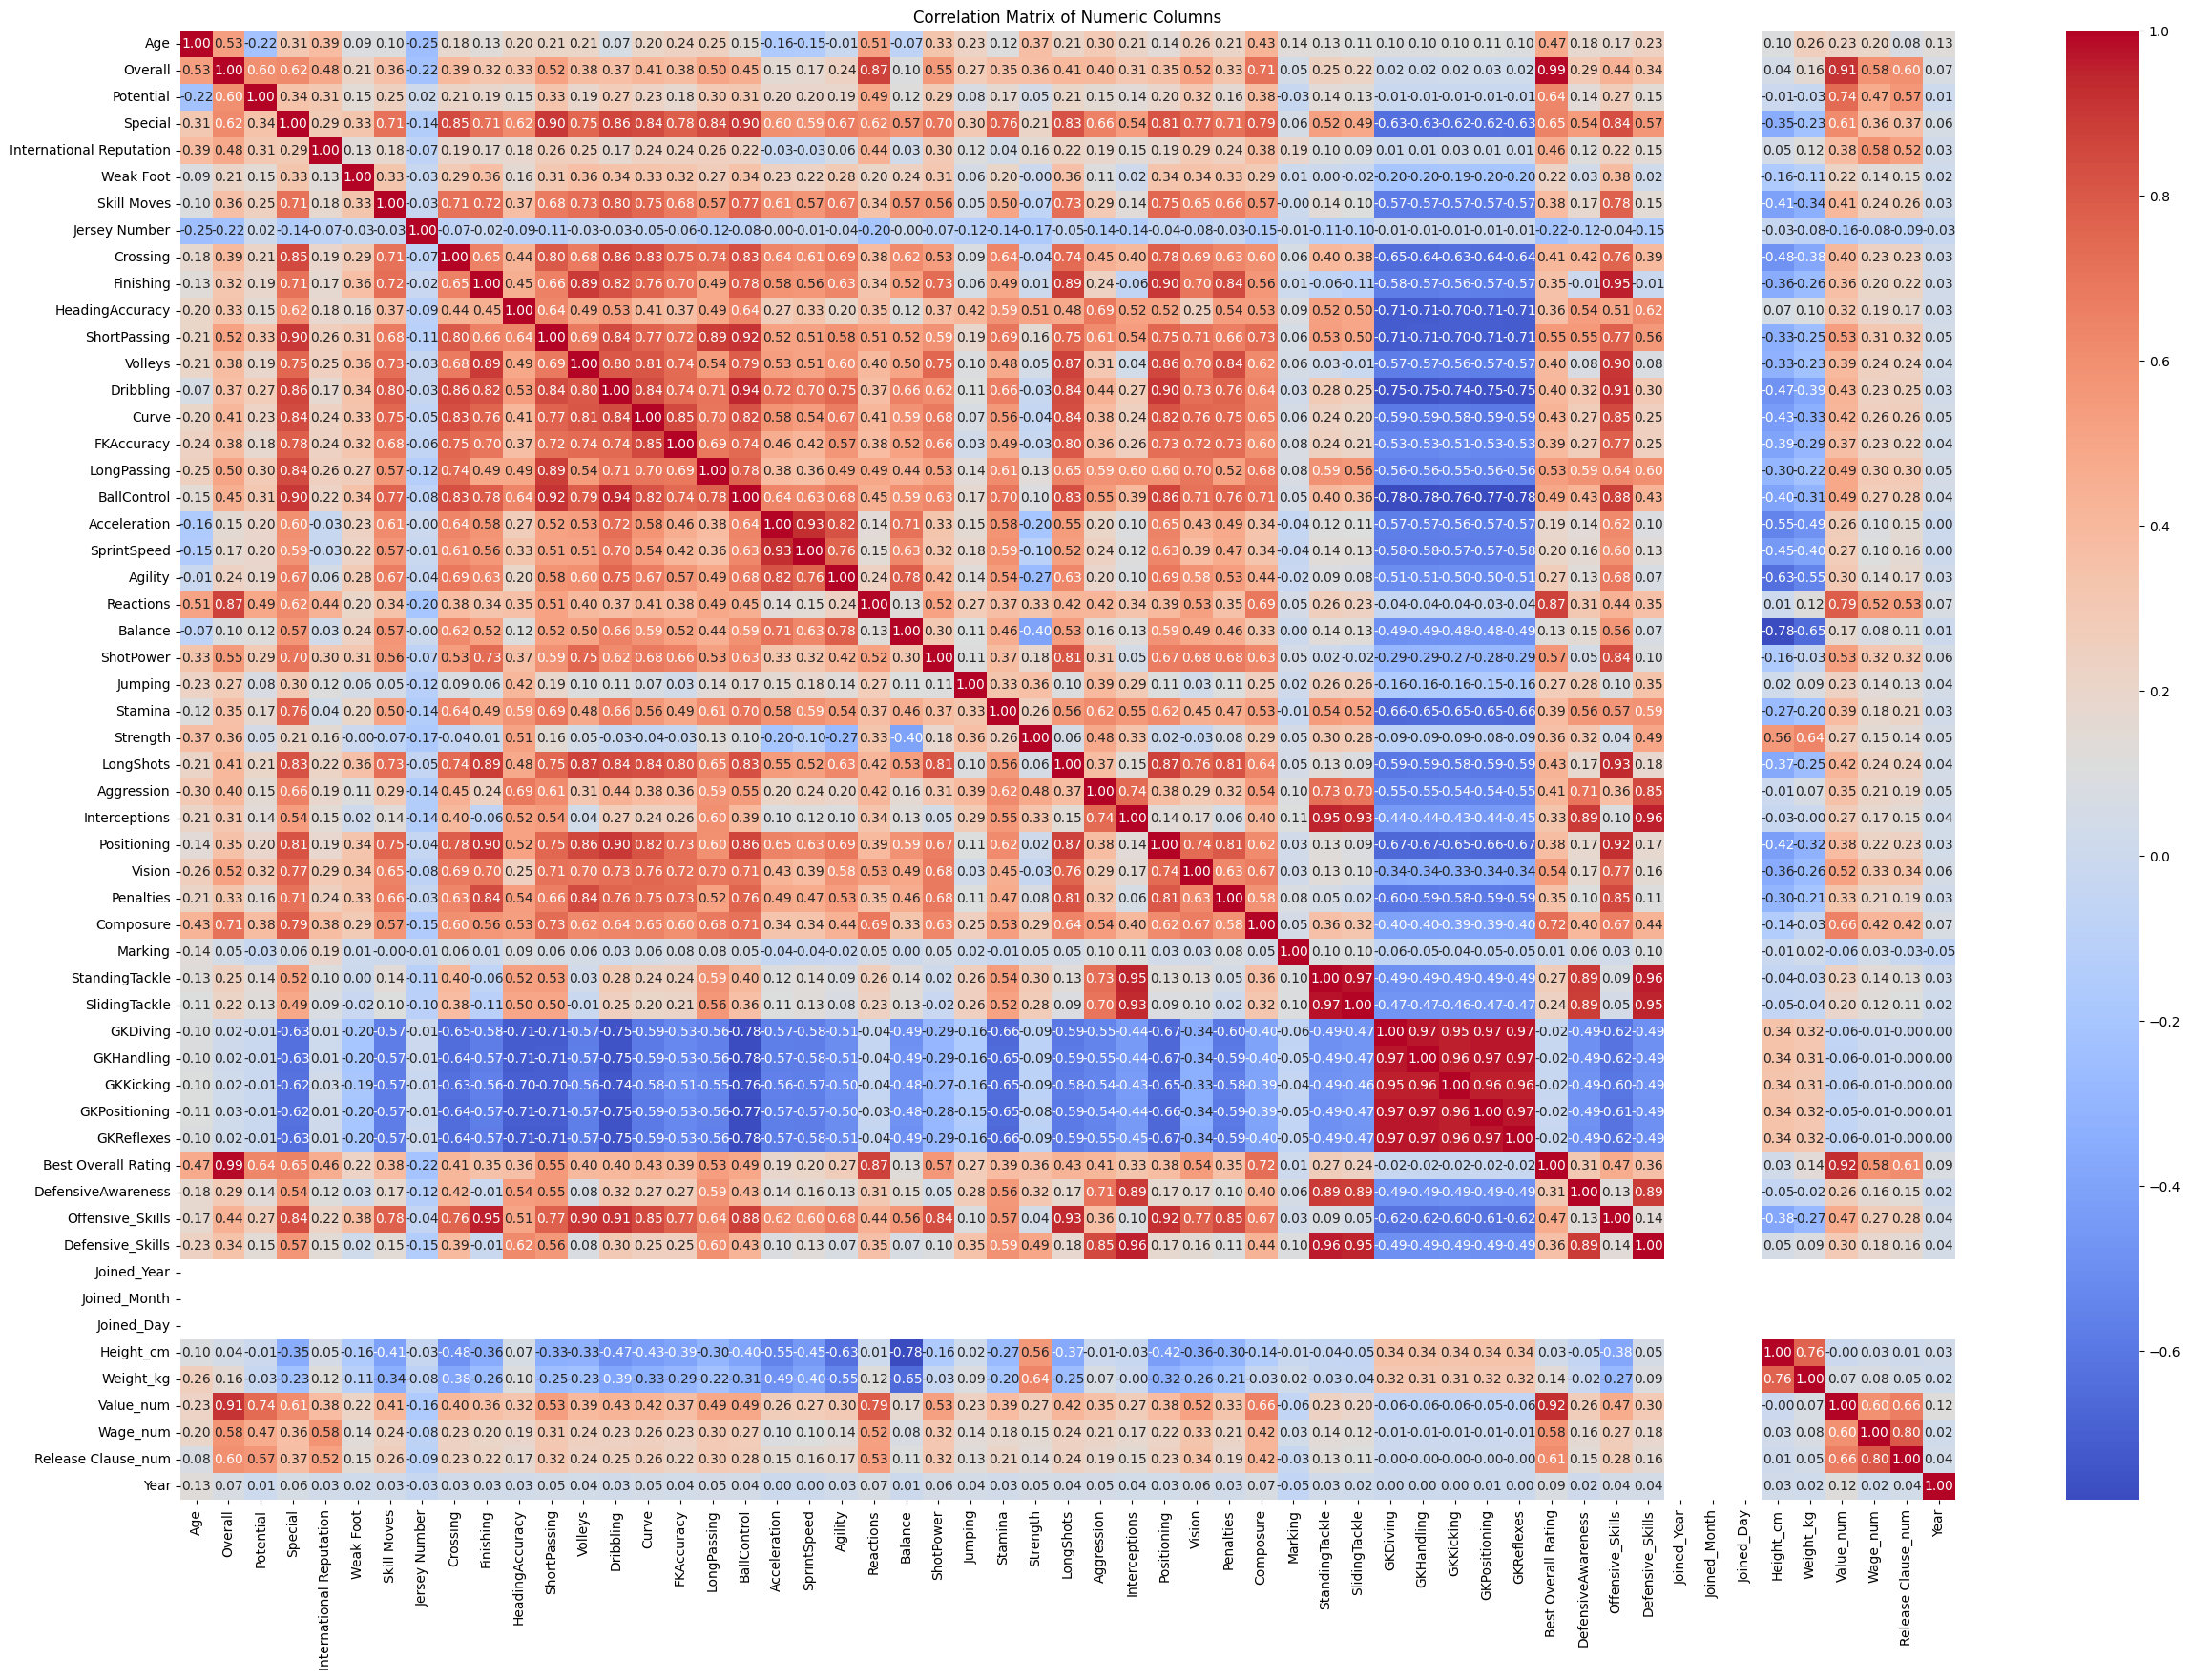

In [84]:
numeric_df = df_FIFA.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

## **Desarrollo del Modelo de Regresión Lineal Simple**


#### **Selección de caracteristicas**

In [85]:
X = df_FIFA[["Overall"]] 
y = df_FIFA['Value_num']

#### **División de los datos en entrenamiento y prueba**

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = True)

print("Datos de entrenamiento: ",X_train.shape)
print("Datos de prueba: ",X_test.shape)

Datos de entrenamiento:  (40420, 1)
Datos de prueba:  (10106, 1)


#### **Creación y entrenamiento de LinearRegression**
**Sklearn-LinearRegression:** [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)	

In [87]:
modelo = LinearRegression( fit_intercept=True,  # que calcule la ordenada al origen
    copy_X=True,         # no modifica tu DataFrame original
    n_jobs=None,         # usa un CPU
    positive=False)

modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### **Predicciones sobre el conjunto de prueba**

In [88]:
#En otros casos se usa el nombre de y_hat para identificar las predicciones 
y_pred = modelo.predict(X_test)

#### **Métricas de evaluación**

In [89]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("-- Métricas de Evaluación del Modelo --")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print(f"R² (Variance score): {r2:.2f}")

-- Métricas de Evaluación del Modelo --
Mean Squared Error (MSE): 0.292591025081048
Root Mean Squared Error (RMSE): 0.5409168374907996
Mean Absolute Error (MAE): 0.3915446747307811
R² (Variance score): 0.83


#### **Visualización grafica**

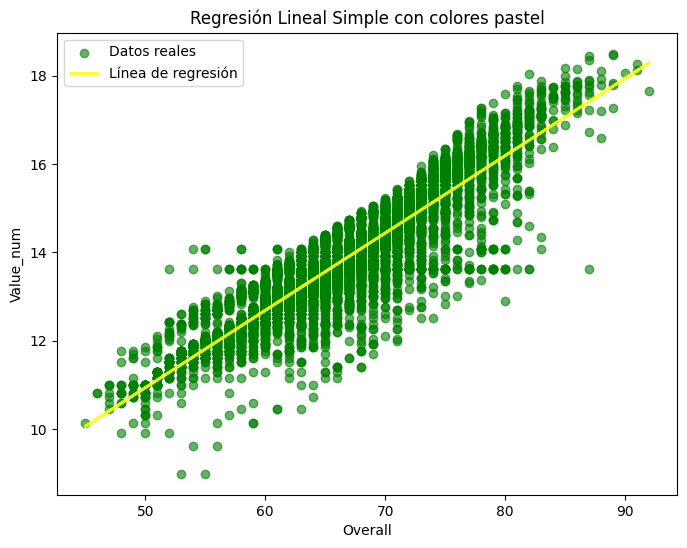

In [90]:
plt.figure(figsize=(8,6))

#Alpha: simplemente trasparencia de los datos

plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Datos reales')

plt.plot(X_test, y_pred, color='yellow', alpha=0.9, label='Línea de regresión', linewidth=2)

plt.xlabel('Overall')
plt.ylabel('Value_num')
plt.title('Regresión Lineal Simple con colores pastel')
plt.legend()
plt.show()

### **GridsearchCV**

In [91]:
modelo = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1] # Added 'n_jobs' as a valid parameter for potential performance improvement
}

# Crear el GridSearchCV
# cv: número de folds para la validación cruzada. 5 es un valor común.
# Added 'n_jobs=-1' to GridSearchCV for parallel processing
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, 
                           cv=5,
                           scoring='r2',
                           n_jobs=-1
                          )

# Entrenar el GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

print(f"Mejores parámetros encontrados por GridSearchCV: {best_params}")

# Predecir con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Calcular métricas con el mejor modelo
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

# Imprimir resultados del mejor modelo
print("\nMétricas del Modelo de Regresión Lineal con 'mejores parámetros':")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R2 Score: {r2_best}")

Mejores parámetros encontrados por GridSearchCV: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}

Métricas del Modelo de Regresión Lineal con 'mejores parámetros':
Mean Squared Error (MSE): 0.292591025081048
Mean Absolute Error (MAE): 0.3915446747307811
Root Mean Squared Error (RMSE): 0.5409168374907996
R2 Score: 0.8341837949429793


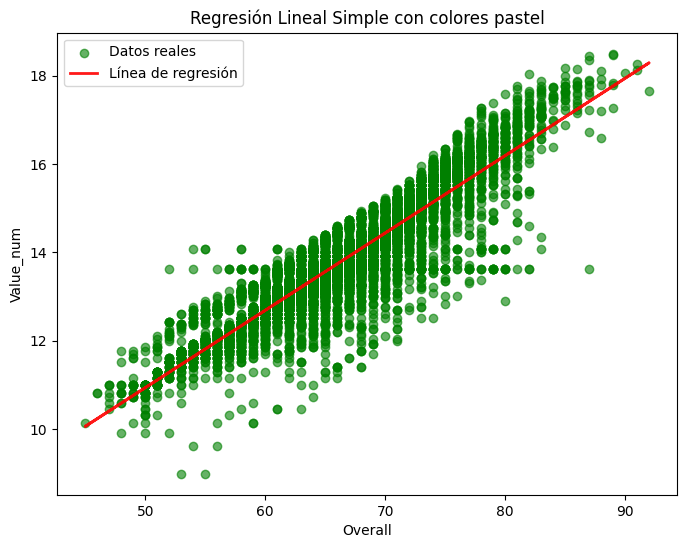

In [92]:
plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Datos reales')
plt.plot(X_test, y_pred, color='red', alpha=0.9, label='Línea de regresión', linewidth=2)

plt.xlabel('Overall')
plt.ylabel('Value_num')
plt.title('Regresión Lineal Simple con colores pastel')
plt.legend()
plt.show()

## **Resultados y Conclusiones**

#### **Resultado 1:** Modelo sin hiperparametros
TEXTO TEXTO TEXTO

metricas: 

#### **Resultado 2:** GridsearchCV
TEXTO TEXTO TEXTO

metricas: 